In [1]:
import numpy as np
import torch
import torch.nn as nn
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import trange

3


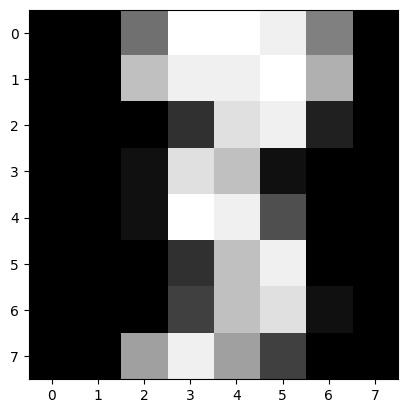

In [2]:
mnist = load_digits()
X,y = mnist.data, mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
plt.imshow(X_train[11].reshape(8,8),cmap='gray')
print(y_train[11])

In [3]:
class fishNet(torch.nn.Module):
  def __init__(self):
    super(fishNet, self).__init__()
    self.l1 = nn.Linear(64,128)
    self.act = nn.ReLU()
    self.l2 = nn.Linear(128,10)

  def forward(self,x):
    x = self.l1(x)
    x = self.act(x)
    x = self.l2(x)
    return x


In [87]:
model = fishNet()
model.forward(torch.tensor(X_train[:10]).float())

tensor([[-1.1866,  2.7495,  0.8017,  2.5000, -2.7862,  2.4104, -1.3987,  1.0586,
          2.5709,  3.0358],
        [ 2.1263, -0.1205, -0.5450,  1.4862, -1.1758, -0.4529, -2.3024,  1.3105,
          0.6915,  0.1108],
        [-0.2003, -0.5934, -1.0552,  1.6941, -0.9637,  0.4691,  0.0532,  0.9180,
          0.8640, -0.1397],
        [ 1.5423,  1.2959,  2.6788,  3.2610, -0.1022,  1.8034, -0.2495,  1.4174,
          1.8866,  0.9735],
        [ 0.9186, -0.8075, -1.8889,  1.1719, -2.4989,  0.8035, -2.1447,  0.1359,
          3.6222, -1.4784],
        [ 1.8067,  0.7857,  0.6755,  1.8968,  0.8977, -1.1235, -2.0004,  1.8881,
          1.1604,  2.3244],
        [-0.7299,  0.5609, -1.8849,  2.2579, -2.4258,  2.3600, -0.3166,  0.9722,
          1.5228,  0.0087],
        [-1.3965,  1.5963,  0.8113,  2.2284, -2.6984,  1.5546, -1.7085,  0.6893,
          1.9873,  2.3140],
        [ 1.1581, -0.3191, -0.0276,  1.1359, -0.7483, -0.8560, -3.1113,  1.4987,
          2.0214,  1.8051],
        [ 3.0172,  

In [92]:
# take 32 example from X_train
BS = 32
loss_function = torch.nn.CrossEntropyLoss()     # cross entropy loss function for n categories
optim = torch.optim.AdamW(model.parameters())   # adamW optimizer, with model's parameters
for i in (t:=trange(1)):
  sample = np.random.randint(0,X_train.shape[0],size=BS,)  # 32 random ints * number of training examples
  X_batch = X_train[sample]                 # select random training examples
  y_batch = y_train[sample]                             # select those same labels
  y_pred = model.forward(torch.tensor(X_batch).float()) # give 10 probabilities for each of 32 examples / 32x10 tensor
  cat = torch.argmax(y_pred,dim=1)  # squish all cols into 1 col (32x1 tensor), store indices of max value in each column
  accuracy = (cat == torch.tensor(y_batch)).float().mean()
  loss = loss_function(y_pred,torch.tensor(y_batch))      # get loss on 32 current exam
  optim.zero_grad()   # zero all gradients
  loss.backward()     # backprop through loss function
  optim.step()        # learn
  t.set_description("loss %.5f accuracy %0.5f"%(loss,accuracy))
print(f"\ntrue label = {y_batch[0]}, prediction = {cat[0].item()}")     # correct label and [wrong] probabilities for that example

# 1. loss function computes the loss on the small batch
# 2. set the gradient to zero
# 3. take the derivatives of the loss function
# 4. learn by stepping with the optimizer

loss 2.46200 accuracy 0.03125: 100%|██████████| 1/1 [00:00<00:00, 157.15it/s]


true label = 7, prediction = 0
